<a href="https://colab.research.google.com/github/sepehr-mousaviyan/Video_based_eye_tracking/blob/develop/landmark_extraction/landmark_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe==0.10.0

In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2


def circle_specific_landmarks(rgb_image, detection_result, selected_indexes, img):
  selected_face_landmarks = get_specific_landmarks(rgb_image, detection_result, selected_indexes)
  x, y = rgb_image.shape[0], rgb_image.shape[1]
  print(x,y)
  # print(np.ceil(x*landmark[0]))
  i = 1
  for landmark in selected_face_landmarks:
    # print(landmark.x)
    X = int(np.ceil(y*(landmark.x)))
    Y = int(np.ceil(x*(landmark.y)))
    img = cv2.circle(img, (X, Y), radius=0, color=(0, 0, 255), thickness=20)

    img = cv2.putText(img, str(i), (X, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    i+=1
    # cv2_imshow(img)
  return img

def get_specific_landmarks(rgb_image, detection_result, selected_indexes):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)
  print(annotated_image.shape)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]
    selected_face_landmarks = []
    for i in selected_indexes:
      selected_face_landmarks.append(face_landmarks[i])
    return selected_face_landmarks

def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]
    # print(face_landmarks)
    # face_landmarks = face_landmarks[1:3]
    # Draw the face landmarks.


    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [ ]:
!wget -q -O image.jpg https://images.unsplash.com/photo-1542909168-82c3e7fdca5c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8OHx8ZmFjZXxlbnwwfHwwfHx8MA%3D%3D&w=1000&q=80
#!wget -q -O image.jpg https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2787&q=80

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
# cv2_imshow(img)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

In [ ]:
# print(get_specific_landmarks(image.numpy_view(), detection_result, [0,2,3]))

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
# print(get_specific_landmarks(image.numpy_view(), detection_result, [1,2,3]))
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


In [ ]:
# val = [451,452,453,454,455,456,457,458,459]
val =[]
# image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
# I have extract the main features that we want inorder to gaze estimasion

left_eye_border =[33,246,161,160,159,158,157,173,133,155,154,153,145,144,163,7]
right_eye_border =[362,398,384,385,386,387,388,466,263,249,390,373,374,380,381,382]
face_greed = [10,338,297,332,284,251,389,356,454,366,361,288,397,365,379,378,400,377,152,148,176,149,150,136,172,58,132,93,234,127,162,21,54,103,67,109]
right_pupil = [473,474,475,476]
left_pupil = [468,469,470,471,472]

for i in range(1,478):
  if (i==-5):
    val.append(1)
  else:
    val.append(i)

circled_image = circle_specific_landmarks(image.numpy_view(), detection_result, val, img)
cv2_imshow(circled_image)

We will also visualize the face blendshapes categories using a bar graph.

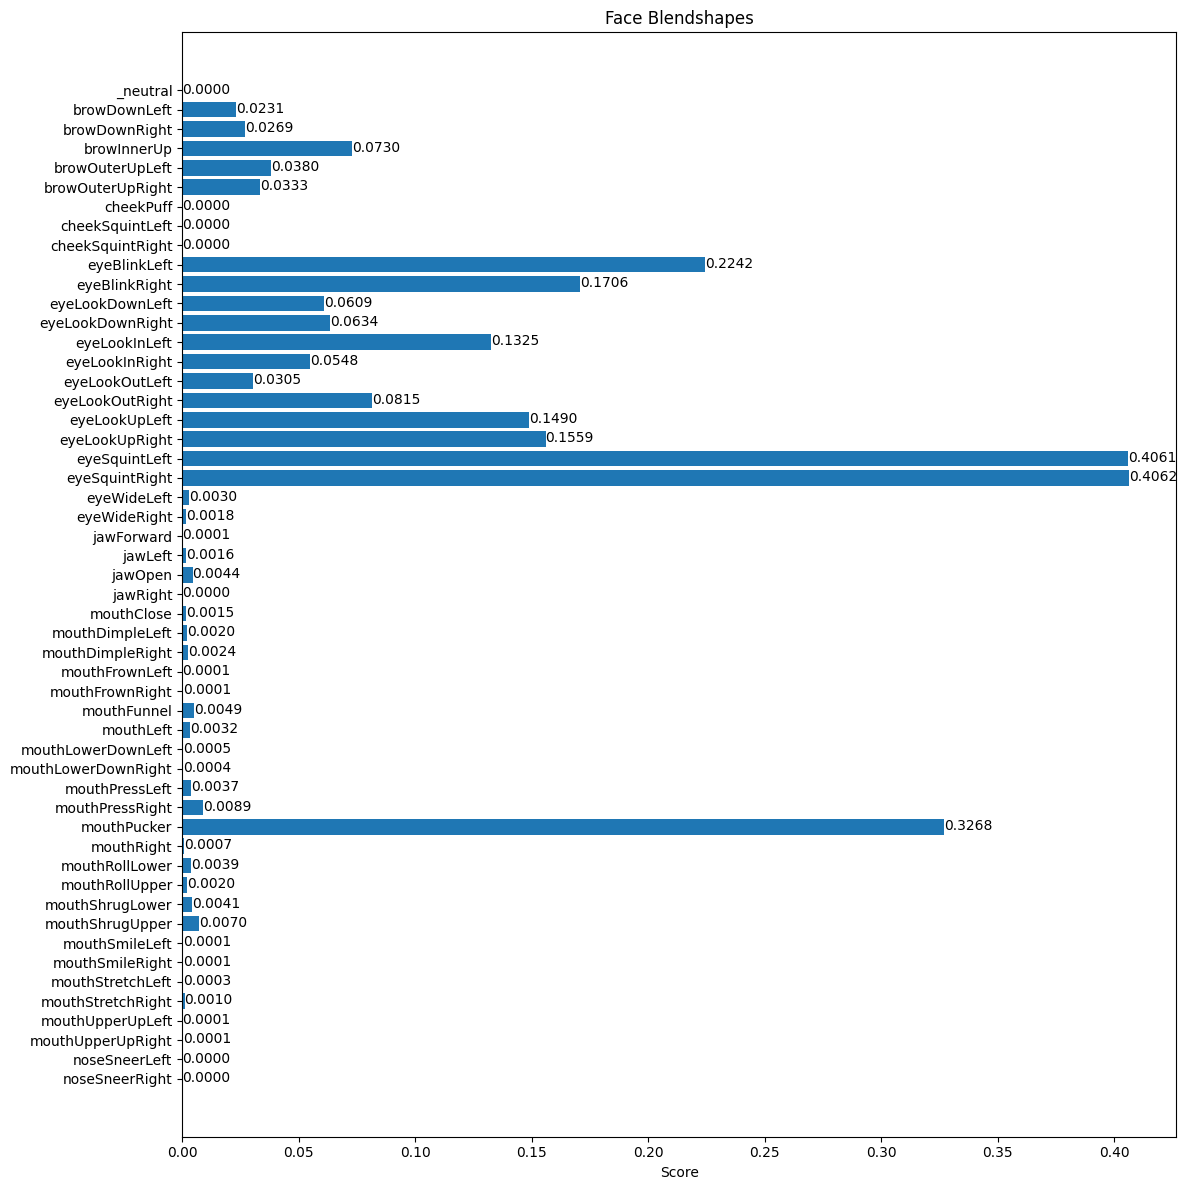

In [ ]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [ ]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.99151647e-01,  1.35866366e-02,  3.88728641e-02,
         4.06752777e+00],
       [-1.30636059e-02,  9.99820888e-01, -1.36789419e-02,
        -3.04008865e+00],
       [-3.90517600e-02,  1.31594837e-02,  9.99150276e-01,
        -3.05405083e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
